# **ENPH 353 Label Images**
Label all those files. Yeah all 2000. Lets gooo

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import re
import os

from matplotlib import pyplot as plt
import cv2

# Importing Plate Data as Numpy Array: 
Tutorial from https://www.kaggle.com/lgmoneda/from-image-files-to-numpy-arrays

2042 names loaded, lets go!


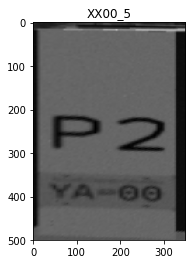

XX00_5 ? 0/2042
[C]orrect, [Z]nope, [B]ack or a 5 letter string please:YA002
written


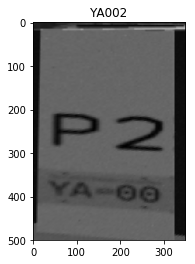

YA002 ? 1/2042
[C]orrect, [Z]nope, [B]ack or a 5 letter string please:YA002
written


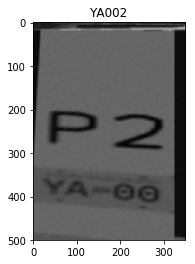

YA002 ? 2/2042
[C]orrect, [Z]nope, [B]ack or a 5 letter string please:YA002
written


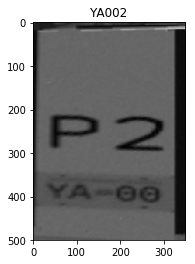

YA002 ? 3/2042
[C]orrect, [Z]nope, [B]ack or a 5 letter string please:YA002
written


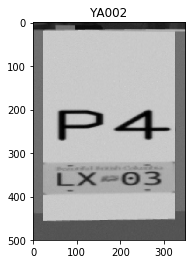

YA002 ? 4/2042


In [ ]:
#First part just gets the filenames and such ready:
folder = os.getcwd() + "/../../../guesses/"
outfolder = os.getcwd() + "/../../../labelled/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
filenames = [] # the image filename 
labels = []     # the label

for _file in onlyfiles: # file names
    filenames.append(_file)
    
print(str(len(filenames)) + " names loaded, lets go!")

laststring = "XX00_5"

i = 0 
while i < range(int(len(filenames))):
    send = True
    location = folder + "/" + filenames[i]
    
    im = cv2.imread(location)
    plt.figure()
    plt.title(laststring)
    plt.imshow(im) 
    plt.show()
    
    print(laststring + " ? " + str(i) + "/" + str(len(filenames)))
    resp = raw_input("[C]orrect, [Z]nope, [B]ack or a 5 letter string please:")
    
    if resp == "C":
        outstring = laststring
        i += 1 
        
    elif resp == "Z":
        print("skipping")
        send = False
        i+= 1
        
    elif resp == "B":
        i-=1
        send = False
        print("go delete your _up")
        
    elif len(resp) == 5:
        outstring = resp
        i += 1
        
    else:
        send = False
        print("Try again:")
        
    laststring = outstring
    if send:
        outlocation = outfolder + outstring[0:4] + "_" + outstring[4] + "_" + str(i) + ".png"
        cv2.imwrite(outlocation, im)
        print("written")
